In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')



In [2]:

trader_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')
print("Trader Data:")
display(trader_df.head())

print("\nSentiment Data:")
display(sentiment_df.head())


Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
trader_df = pd.read_csv('/content/historical_data.csv', dtype={'Timestamp': str})
trader_df['Timestamp'] = pd.to_numeric(trader_df['Timestamp'], errors='coerce')
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms', errors='coerce')
trader_df['Date'] = trader_df['Timestamp'].dt.date
print(trader_df[['Timestamp', 'Date']].head())


            Timestamp        Date
0 2024-10-27 03:33:20  2024-10-27
1 2024-10-27 03:33:20  2024-10-27
2 2024-10-27 03:33:20  2024-10-27
3 2024-10-27 03:33:20  2024-10-27
4 2024-10-27 03:33:20  2024-10-27


In [12]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

merged_df = pd.merge(trader_df, sentiment_df, left_on='Date', right_on='date', how='inner')
print(merged_df.shape)
merged_df.head()


(184263, 21)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27


In [13]:
# View shape and first few rows
print(merged_df.shape)
print(merged_df.head())
print(merged_df.columns)


(184263, 21)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID  \
0         0.0  ...  520

In [14]:
print(merged_df.isnull().sum())


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
timestamp           0
value               0
classification      0
date                0
dtype: int64


In [21]:
merged_df.rename(columns={
    'Execution Price': 'Price',
    'value': 'Sentiment_Score',
    'classification': 'Sentiment_Label'
}, inplace=True)


In [22]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])


In [16]:
merged_df.dropna(inplace=True)


In [18]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])


In [9]:
print(trader_df['Timestamp'].unique())

<DatetimeArray>
['1970-01-01 00:28:50', '1970-01-01 00:29:00', '1970-01-01 00:29:10',
 '1970-01-01 00:28:30', '1970-01-01 00:28:40', '1970-01-01 00:28:20',
 '1970-01-01 00:28:00']
Length: 7, dtype: datetime64[ns]


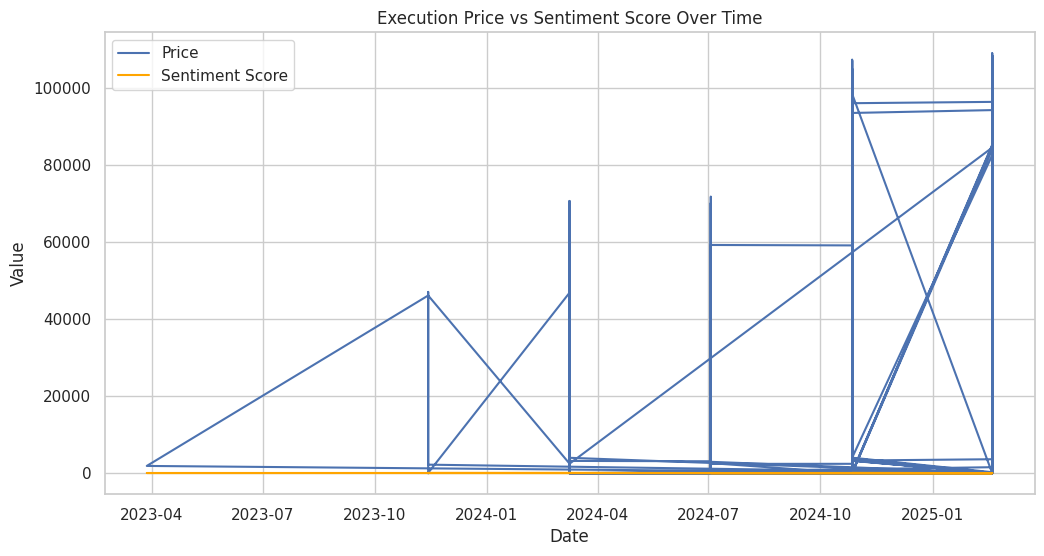

In [23]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['Date'], merged_df['Price'], label='Price')
plt.plot(merged_df['Date'], merged_df['Sentiment_Score'], label='Sentiment Score', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Execution Price vs Sentiment Score Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
summary = merged_df.groupby('Sentiment_Label')[['Price']].mean()
print(summary)


                        Price
Sentiment_Label              
Extreme Greed     9771.897315
Fear             11102.057978
Greed             5513.715386
Neutral           2663.132338


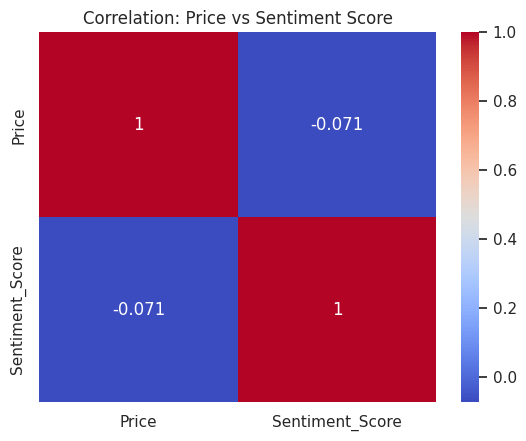

In [24]:


sns.heatmap(merged_df[['Price', 'Sentiment_Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation: Price vs Sentiment Score')
plt.show()


In [4]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])
trader_df['Date'] = trader_df['Timestamp'].dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [3]:
print("Trader Data Columns:\n", trader_df.columns)
print("\nSentiment Data Columns:\n", sentiment_df.columns)


Trader Data Columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Sentiment Data Columns:
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
